# Linear Regression - Using only NumPy
---

Hey folks. 

Today I'm going to show you how to apply a basic linear regression model to a dataset on Swedish Car insurance.

It's the same one used here on MachineLearningMastery:

I like to think of mathematics merely as "notation". It's just a symbolic way to represent ideas concisely and rigorously.

Let $X$ be an $n$ x $k$ matrix of observations where:  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $k$:  number of **indepdenent** (explanatory) variables  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $n$: the number of **observations** (e.g people)

$y$ is an $n$ x $1$ vector of observations on the **dependent** variable



# A Linear Model

The mathematical statement for a linear model is as follows:

$$ \mathbf{y = X\beta + \epsilon}$$

In a setting with **one observation** and **k variables**, the model would look like this:

$$ y_1 = \beta_0 + \beta_1X_{1,1} + \beta_2X_{1,2} + ... + \beta_kX_{k} + \epsilon_1 $$

In a setting with **one variable** and **n observations**, the model would look like this:

$$
\begin{bmatrix}y_1 \\ y_2 \\ ... \\ y_n\end{bmatrix} = 
\begin{bmatrix}\beta_0 + \beta_1X_1  \\ \beta_0 + \beta_1X_2 \\ ... \\ \beta_0 + \beta_1X_n  \end{bmatrix}
+ \begin{bmatrix} \epsilon_1 \\ \epsilon_2 \\ ... \\ \epsilon_n \end{bmatrix}
$$

This can be re-shaped in matrices for compactness:

$$
\begin{bmatrix}y_1 \\ y_2 \\ ... \\ y_n\end{bmatrix} = 
\begin{bmatrix} 1 & X_1\\ 1 & X_2\\... & ... \\ 1 & X_n\\ \end{bmatrix}\begin{bmatrix} \beta_0 \\ \beta_1\end{bmatrix}
+ \begin{bmatrix} \epsilon_1 \\ \epsilon_2 \\ ... \\ \epsilon_n \end{bmatrix}
$$

And, as in our case, with **n observations** and **k variables**:

$$
\begin{bmatrix}
    y_1 \\ y_2 \\ ... \\ y_n
\end{bmatrix} = 
\begin{bmatrix}
    \beta_0 + \beta_1X_{1,1} + \beta_2X_{1,2} + ... + \beta_kX_{1,k}
    \\ \beta_0 + \beta_1X_{2,1} + \beta_2X_{2,2} + ... + \beta_kX_{2,k}
    \\ ...
    \\ \beta_0 + \beta_1X_{n,1} + \beta_2X_{n,2} + ... + \beta_kX_{n,k}
\end{bmatrix}
+ \begin{bmatrix} \epsilon_1 \\ \epsilon_2 \\ ... \\ \epsilon_n \end{bmatrix}
$$

Which again can be expressed more compactly as:

$$
\begin{bmatrix}
    y_1 \\ y_2 \\ ... \\ y_n
\end{bmatrix}
=
\begin{bmatrix}
    1 & X_{1,1} & X_{1,2} & ... & X_{1,k}
    \\ 1 & X_{2,1} & X_{2,2} & ... & X_{2,k}
    \\... & ... & ... & ... & ...
    \\ 1 & X_{n,1} & X_{n,2} & ... & X_{n,k}
\end{bmatrix}
\begin{bmatrix}
    \beta_0 \\ \beta_1 \\ ... \\ \beta_k
\end{bmatrix}
+ 
\begin{bmatrix} \epsilon_1 \\ \epsilon_2 \\ ... \\ \epsilon_n \end{bmatrix}
$$

$\beta$ represents the population **parameters**. This captures the **deterministic** relationship between the **independent** variables $\mathbf{X}$ and the **dependent** variable $y$.

The "remainder" of $y$ is then described by the **errors** or the **stochastic** component $\epsilon$

The goal of linear regression is to find an **estimate** $\hat{\beta}$ of the population parameter $\beta$.

In practice, this is done by collecting a **random sample** of the data from the population and then estimating the parameters with a method known as **least squares** which is discussed next.

# Estimation
---

The criteria for an **estimator** to be the **least squares estimator** of a population parameter, is that it minimises the **residual sum of squares of the errors**.

In notation:

$$ RSS = \Sigma^n_{i=1} e^2_i $$

Where:

$$ e = y - X\beta  $$

From the expression:

$$ y = X\beta + e $$

It is crucial here to note the following expression holds true:

$$ RSS = \Sigma^n_{i=1} e^2_i = e'e $$

#### Example

This can be seen from a simple 1x3 dimension example.

Suppose $e = \begin{bmatrix} 2 \\ 5 \\ 6 \end{bmatrix} $ then in this case $ e' = \begin{bmatrix} 2 & 5 & 6 \end{bmatrix} $ 
and furthermore than $ e'e = \begin{bmatrix} 2 & 5 & 6 \end{bmatrix}\begin{bmatrix} 2 \\ 5 \\ 6  \end{bmatrix} $ = $ 2 \cdot 2 + 5\cdot5 + 6\cdot6 = \Sigma^n_{i=1} e^2_i $ 

#### Rewriting the Residual Sum of Squares

This expression is useful because it allows us to rewrite our $RSS$ statement as follows:

$$ RSS = \Sigma^n_{i=1} e^2_i = e'e = (y - X\beta)'(y  - X\beta) $$

The expression is simplified as follows:

$$ (y - X\beta )'(y  - X\beta ) $$
$$ ( y' -  \beta'X')(y - X\beta ) $$ 
$$ y'y + \beta' X' X \beta  -  \beta'X'y - y'X\beta $$  

Here it helps to keep track of the **dimensions** of the terms in the expression.

In particular noting that $ y' X \beta  $ is a term consisting of a 
$\begin{bmatrix} 1 \cdot n \end{bmatrix}$, $\begin{bmatrix} n \cdot k \end{bmatrix}$, $\begin{bmatrix} k \cdot 1 \end{bmatrix}$ matrix composite ,which is a $\begin{bmatrix} 1 \cdot 1 \end{bmatrix}$ scalar.

And since the transpose of a scalar is that scalar $ (2'= 2) $, then $ (y'X\beta)' = \beta' X' y$

This leaves us with:

$$ y'y + \beta' X' X \beta  -  \beta'X'y -  \beta'X'y$$ 
$$ y'y + \beta' X' X \beta  -  2\cdot \beta'X'y$$ 

#### Minimising (deriving) the RSS

In order for a function to be a minimum, one must derive the function with respect to the choice variable, setting this derivative equal to zero.

The variable(s) that are free to vary in this expression is the vector of $ \beta $. That is the variable with respect to which we must derive the **objective function**.

$$ \frac{\partial RSS}{\partial \hat{\beta}} = \frac{\partial (y'y + \hat{\beta}' X' X \hat{\beta}  -  2\cdot \hat{\beta}'X'y) }{\hat{\partial} \beta} = 0 $$   
$$-2X'y + 2X'X\hat{\beta} = 0 $$   
$$ 2X'X\hat{\beta} = 2X'y $$   
$$ X'X\hat{\beta} = X'y $$   
$$ (X'X)^{-1}X'X\hat{\beta} = (X'X)^{-1}X'y $$  
$$ \hat{\beta} =  (X'X)^{-1}X'y $$  


# Data
---

Read the data into an "X" vector

In [88]:
# Import

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

data = open("insurance/sweden.txt", "r").read()

print data

# Data science top tip

"""
If your dataset looks something like this, with unnecessary extra lines, and commas where you want periods for
floats - just go into the file and edit it manually. 

If it's easier to do it once in a spreadsheet viewer or a text editor - don't write code for it.
"""


Auto Insurance in Sweden

In the following data
X = number of claims
Y = total payment for all the claims in thousands of Swedish Kronor
for geographical zones in Sweden
Reference: Swedish Committee on Analysis of Risk Premium in Motor Insurance
http://college.hmco.com/mathematics/brase/understandable_statistics/7e/students/datasets/
       slr/frames/frame.html

X	Y
108	392,5
19	46,2
13	15,7
124	422,2
40	119,4
57	170,9
23	56,9
14	77,5
45	214
10	65,3
5	20,9
48	248,1
11	23,5
23	39,6
7	48,8
2	6,6
24	134,9
6	50,9
3	4,4
23	113
6	14,8
9	48,7
9	52,1
3	13,2
29	103,9
7	77,5
4	11,8
20	98,1
7	27,9
4	38,1
0	0
25	69,2
6	14,6
5	40,3
22	161,5
11	57,2
61	217,6
12	58,1
4	12,6
16	59,6
13	89,9
60	202,4
41	181,3
37	152,8
55	162,8
41	73,4
11	21,3
27	92,6
8	76,1
3	39,9
17	142,1
13	93
13	31,9
15	32,1
8	55,6
29	133,3
30	194,5
24	137,9
9	87,4
31	209,8
14	95,5
53	244,6
26	187,5



"\nIf your dataset looks something like this, with unnecessary extra lines, and commas where you want periods for\nfloats - just go into the file and edit it manually. \n\nIf it's easier to do it once in a spreadsheet viewer or a text editor - don't write code for it.\n"

In [202]:
data = np.loadtxt("insurance/sweden1.txt")

# print data

X = np.array(data[:,0])
Y = np.array(data[:,1])

input_x = X
output_y = Y

# Let's have a look at our data
---

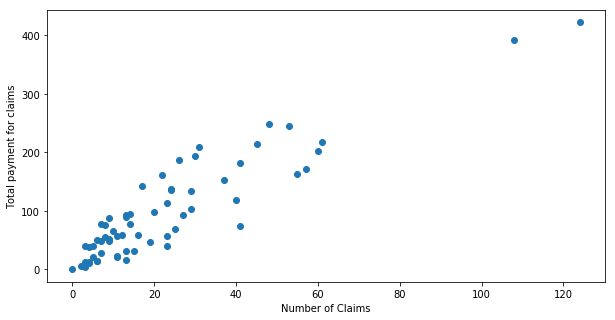

In [186]:
plt.scatter(X,Y)
plt.xlabel('Number of Claims', fontsize=10)
plt.ylabel('Total payment for claims', fontsize=10)

It's apparent that there is an (expected) positive relationship between our "number of claims" and the "total payment for claims" variables.

The relationship appears to be approximately linear.

If your goal is to estimate the linear relationship between these two variables, a linear regression would do the trick.

Let's fit a regression line to this data.

In [187]:
# Let's transform our vectors into numpy matrices

X = np.matrix(X)
Y = np.matrix(Y)

"""
Even though our results won't be much different (since our regression line is likely going through the origin),
it's still generally good practice to add a constant term.

To do so, we'll need to append a column of ones to our
"""


ones = np.ones(63)

X = np.vstack([ones, X])

print X

[[   1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
     1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
     1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
     1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
     1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
     1.    1.    1.]
 [ 108.   19.   13.  124.   40.   57.   23.   14.   45.   10.    5.   48.
    11.   23.    7.    2.   24.    6.    3.   23.    6.    9.    9.    3.
    29.    7.    4.   20.    7.    4.    0.   25.    6.    5.   22.   11.
    61.   12.    4.   16.   13.   60.   41.   37.   55.   41.   11.   27.
     8.    3.   17.   13.   13.   15.    8.   29.   30.   24.    9.   31.
    14.   53.   26.]]


In [198]:
# X = np.transpose(X)
# Y = np.transpose(Y)

#a = np.matmul(np.transpose(X),X)

#b = np.matmul(np.transpose(X), Y)

a_inv = np.linalg.inv(a)

beta = np.matmul(a_inv, b)

beta

# Ta-da! Our constant term  Beta_0 is 19.99 and our 

matrix([[ 19.99448576],
        [  3.41382356]])

In [227]:
# Now that we have our estimates, it is simple enough to check them
# Remember out varialbes input_X, and output_y

cov_x_y = np.cov(input_x, output_y)

var_x = np.var(input_x)

# Betas

beta_1 = cov_x_y[0,1] / var_x

beta_0 = np.mean(output_y) - beta_1*np.mean(input_x)

(3.4688852303900193, 18.733311310273052)